In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [4]:
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017


In [5]:
train.shape

(2452, 8)

In [6]:
test.shape

(1051, 7)

In [7]:
print("Train Data Info:")
print(train.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB
None


In [8]:
print("\nTest Data Info:")
print(test.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        1051 non-null   object 
 1   Product_Brand  1051 non-null   object 
 2   Item_Category  1051 non-null   object 
 3   Subcategory_1  1051 non-null   object 
 4   Subcategory_2  1051 non-null   object 
 5   Item_Rating    1051 non-null   float64
 6   Date           1051 non-null   object 
dtypes: float64(1), object(6)
memory usage: 57.6+ KB
None


In [9]:
print("\nTrain Data Statistics:")
print(train.describe())


Train Data Statistics:
       Item_Rating  Selling_Price
count  2452.000000    2452.000000
mean      3.078467    2494.375612
std       1.187137    7115.256516
min       1.000000      33.000000
25%       2.000000     371.000000
50%       3.100000     596.000000
75%       4.100000    1195.250000
max       5.000000  116289.000000


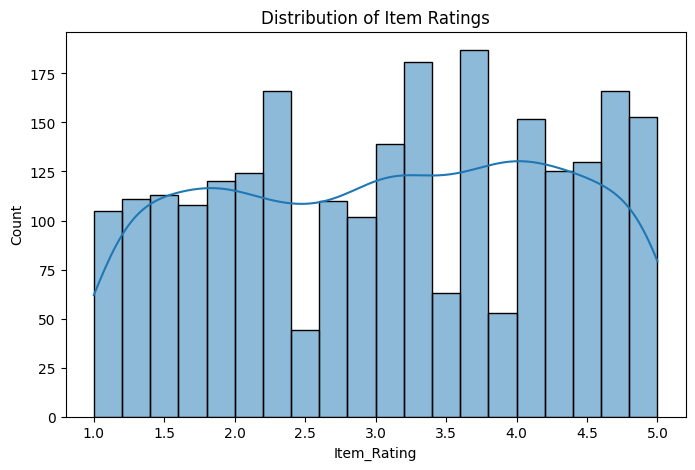

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Item_Rating'], bins=20, kde=True)
plt.title('Distribution of Item Ratings')
plt.show()

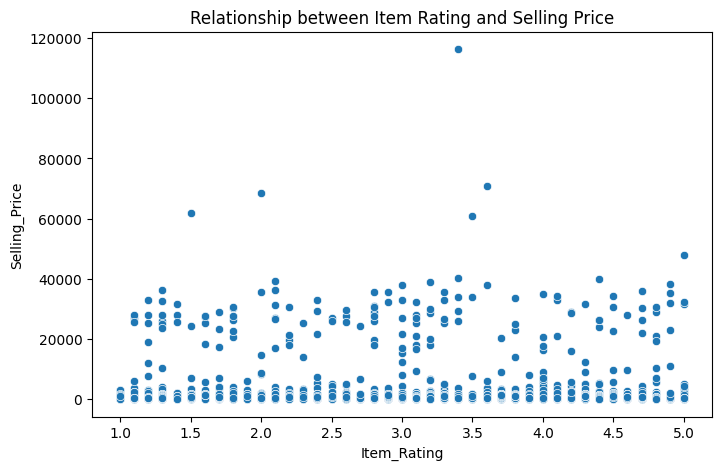

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_Rating', y='Selling_Price', data=train)
plt.title('Relationship between Item Rating and Selling Price')
plt.show()

In [12]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [13]:
train['Month'] = train['Date'].dt.month
test['Month'] = test['Date'].dt.month
train['Year'] = train['Date'].dt.year
test['Year'] = test['Date'].dt.year

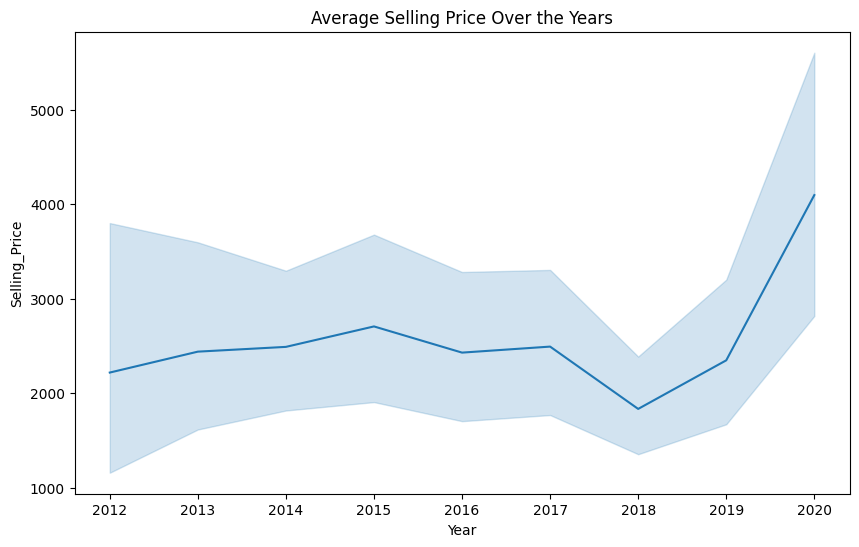

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Selling_Price', data=train, estimator='mean')
plt.title('Average Selling Price Over the Years')
plt.show()

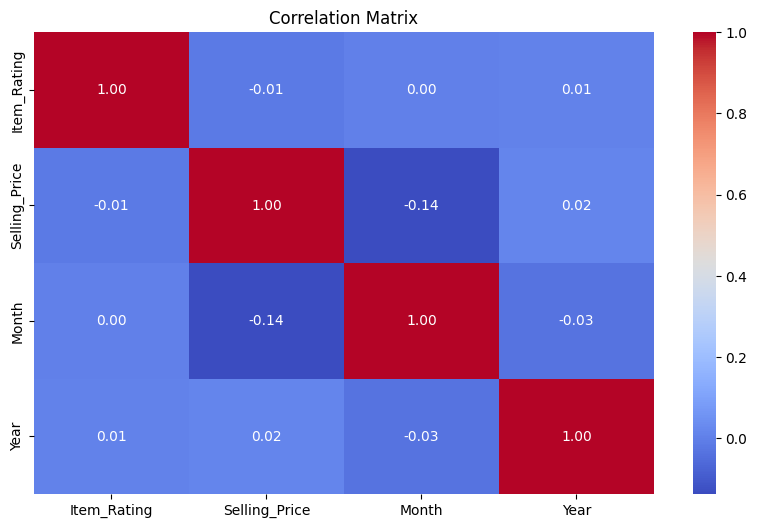

In [15]:
correlation_matrix = train[['Item_Rating', 'Selling_Price', 'Month', 'Year']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

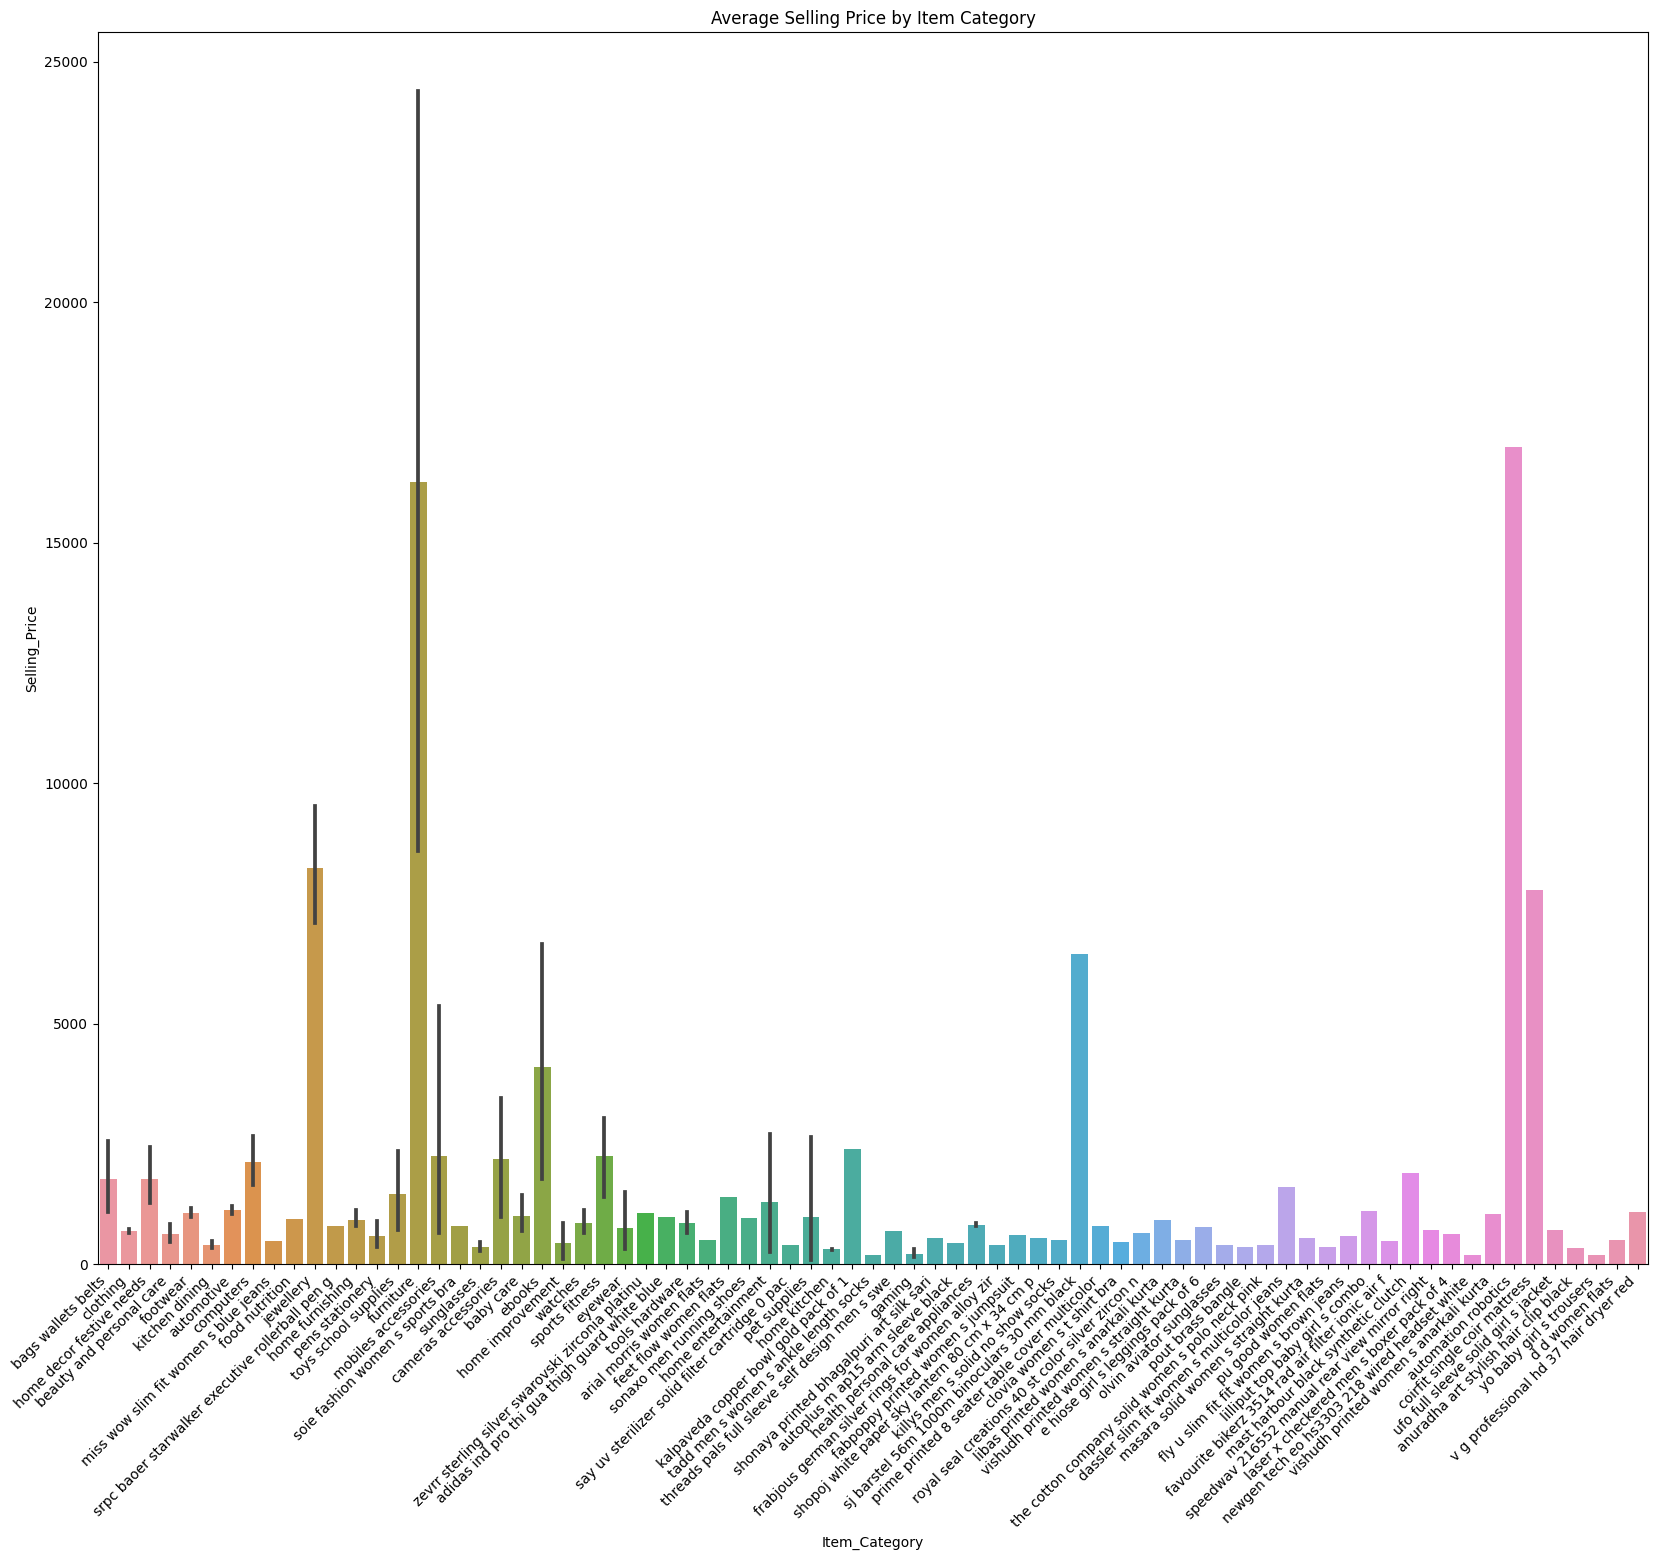

In [16]:
plt.figure(figsize=(20, 16))
sns.barplot(x='Item_Category', y='Selling_Price', data=train)
plt.title('Average Selling Price by Item Category')
plt.xticks(rotation=45, ha='right')
plt.show()

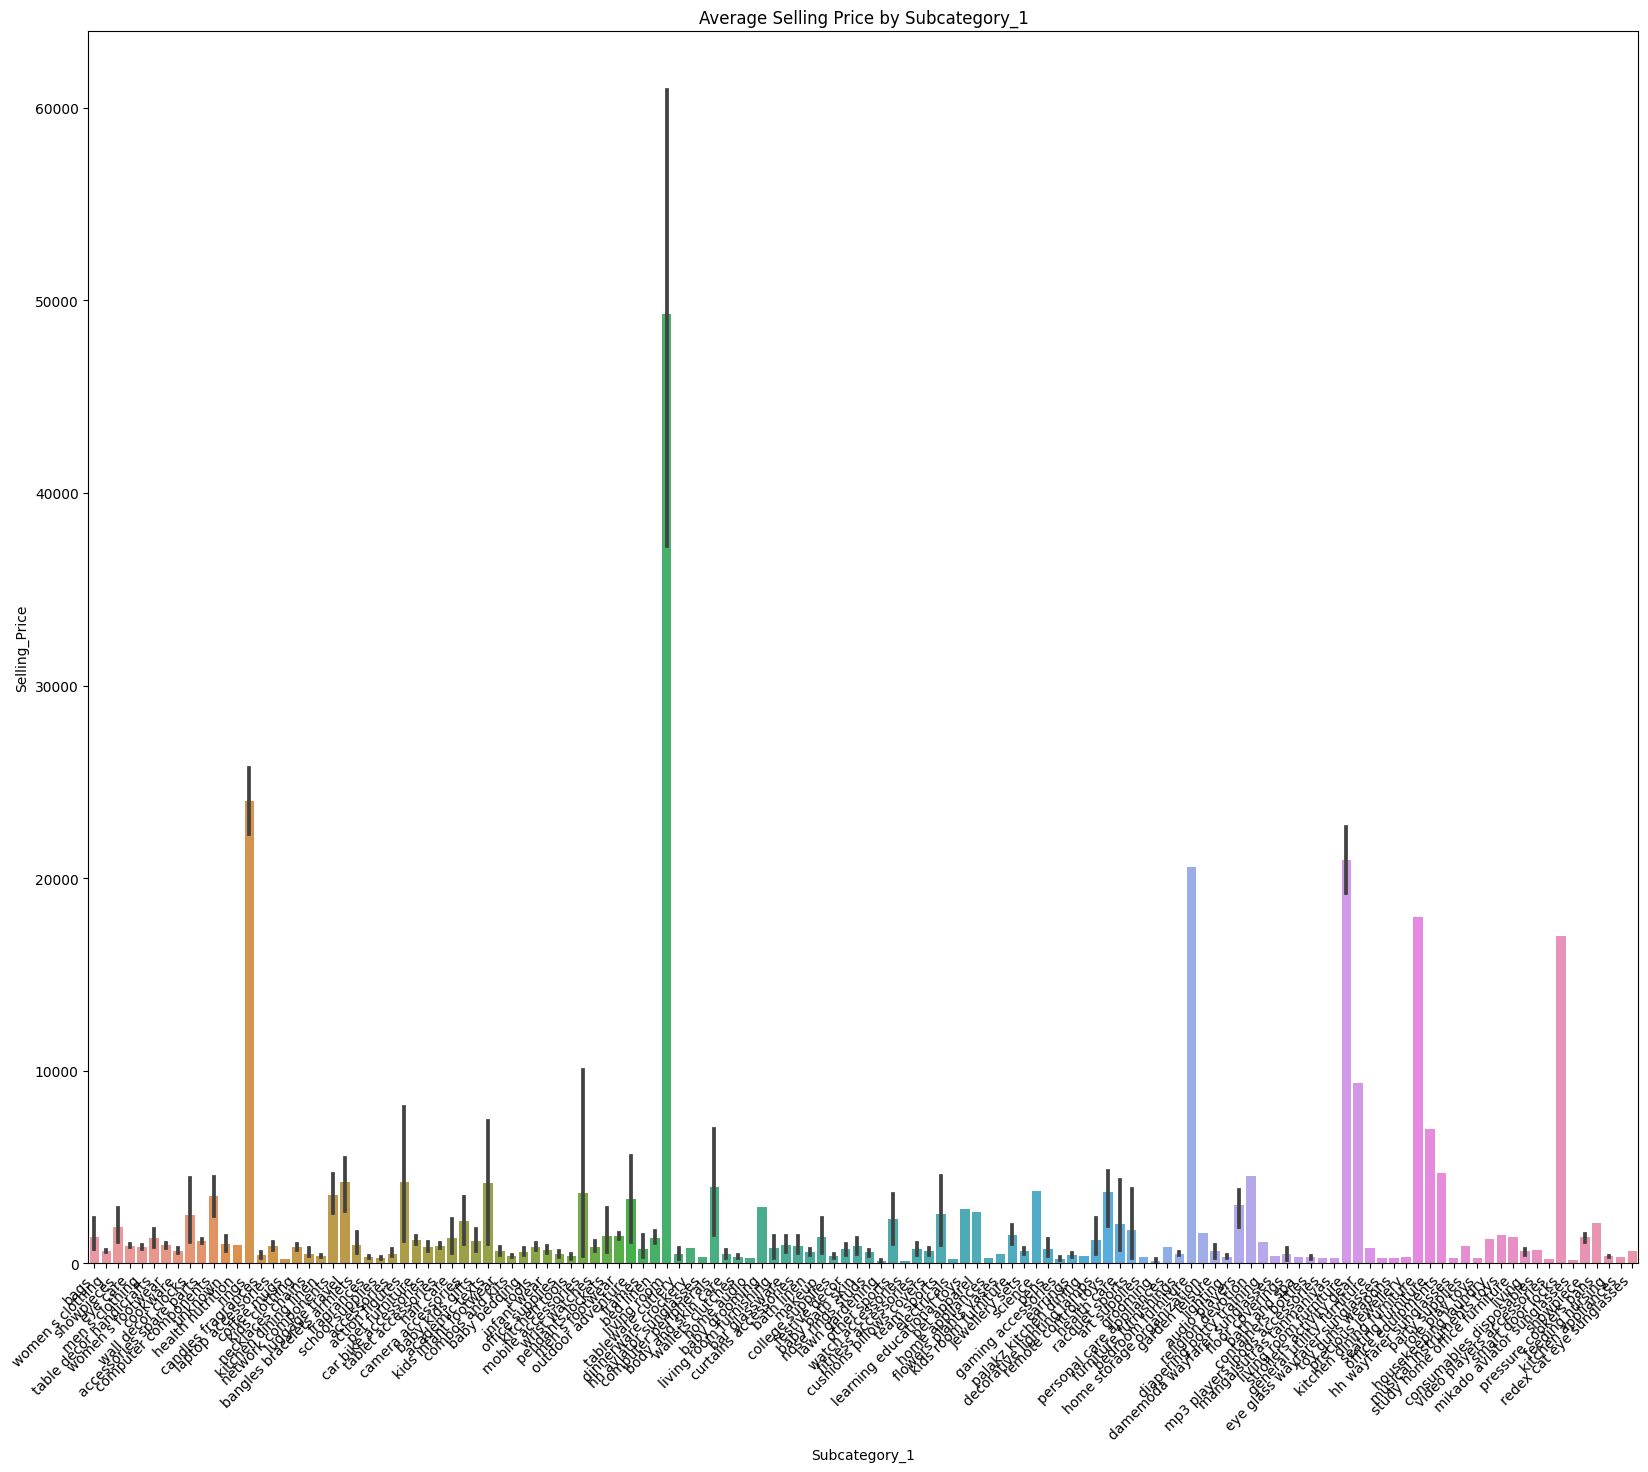

In [17]:
plt.figure(figsize=(20, 16))
sns.barplot(x='Subcategory_1', y='Selling_Price', data=train)
plt.title('Average Selling Price by Subcategory_1')
plt.xticks(rotation=45, ha='right')
plt.show()

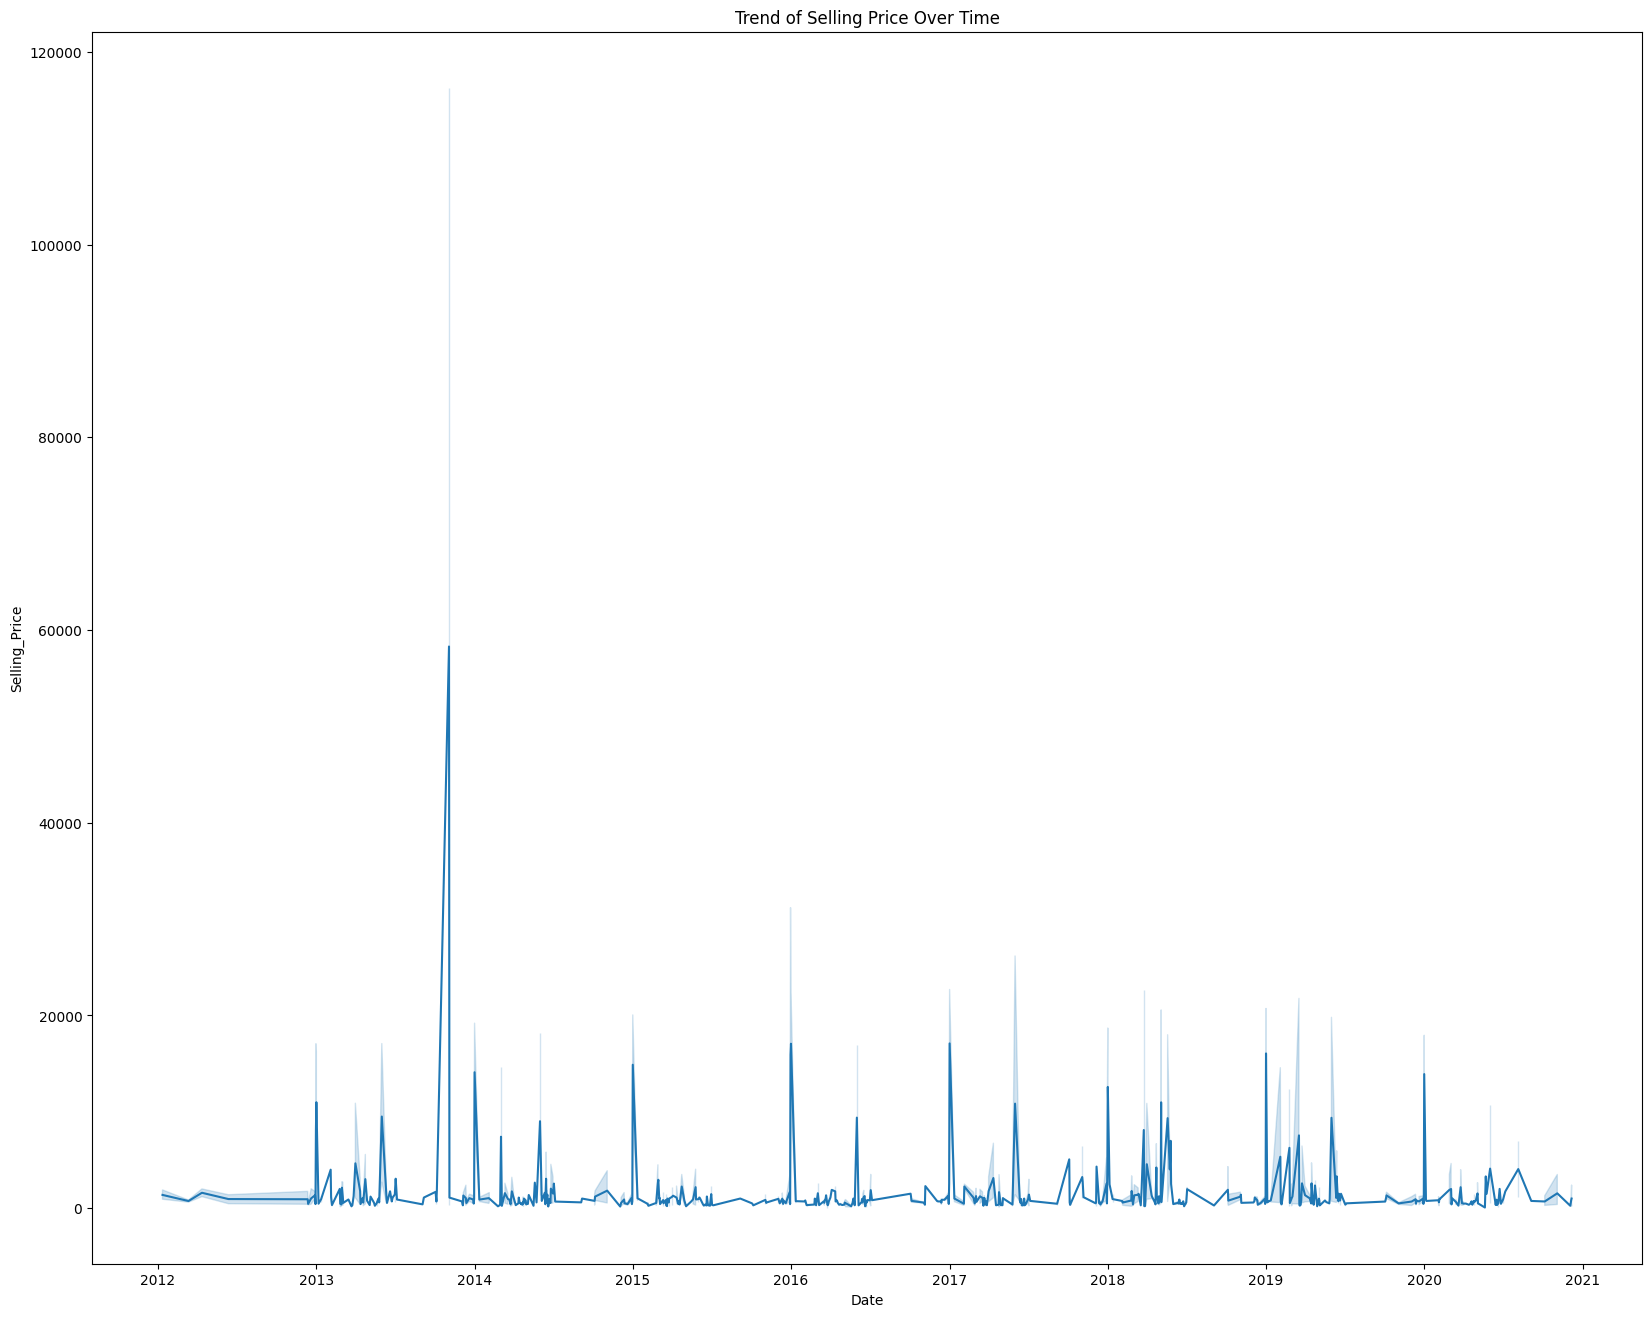

In [18]:
plt.figure(figsize=(20, 16))
sns.lineplot(x='Date', y='Selling_Price', data=train)
plt.title('Trend of Selling Price Over Time')
plt.show()

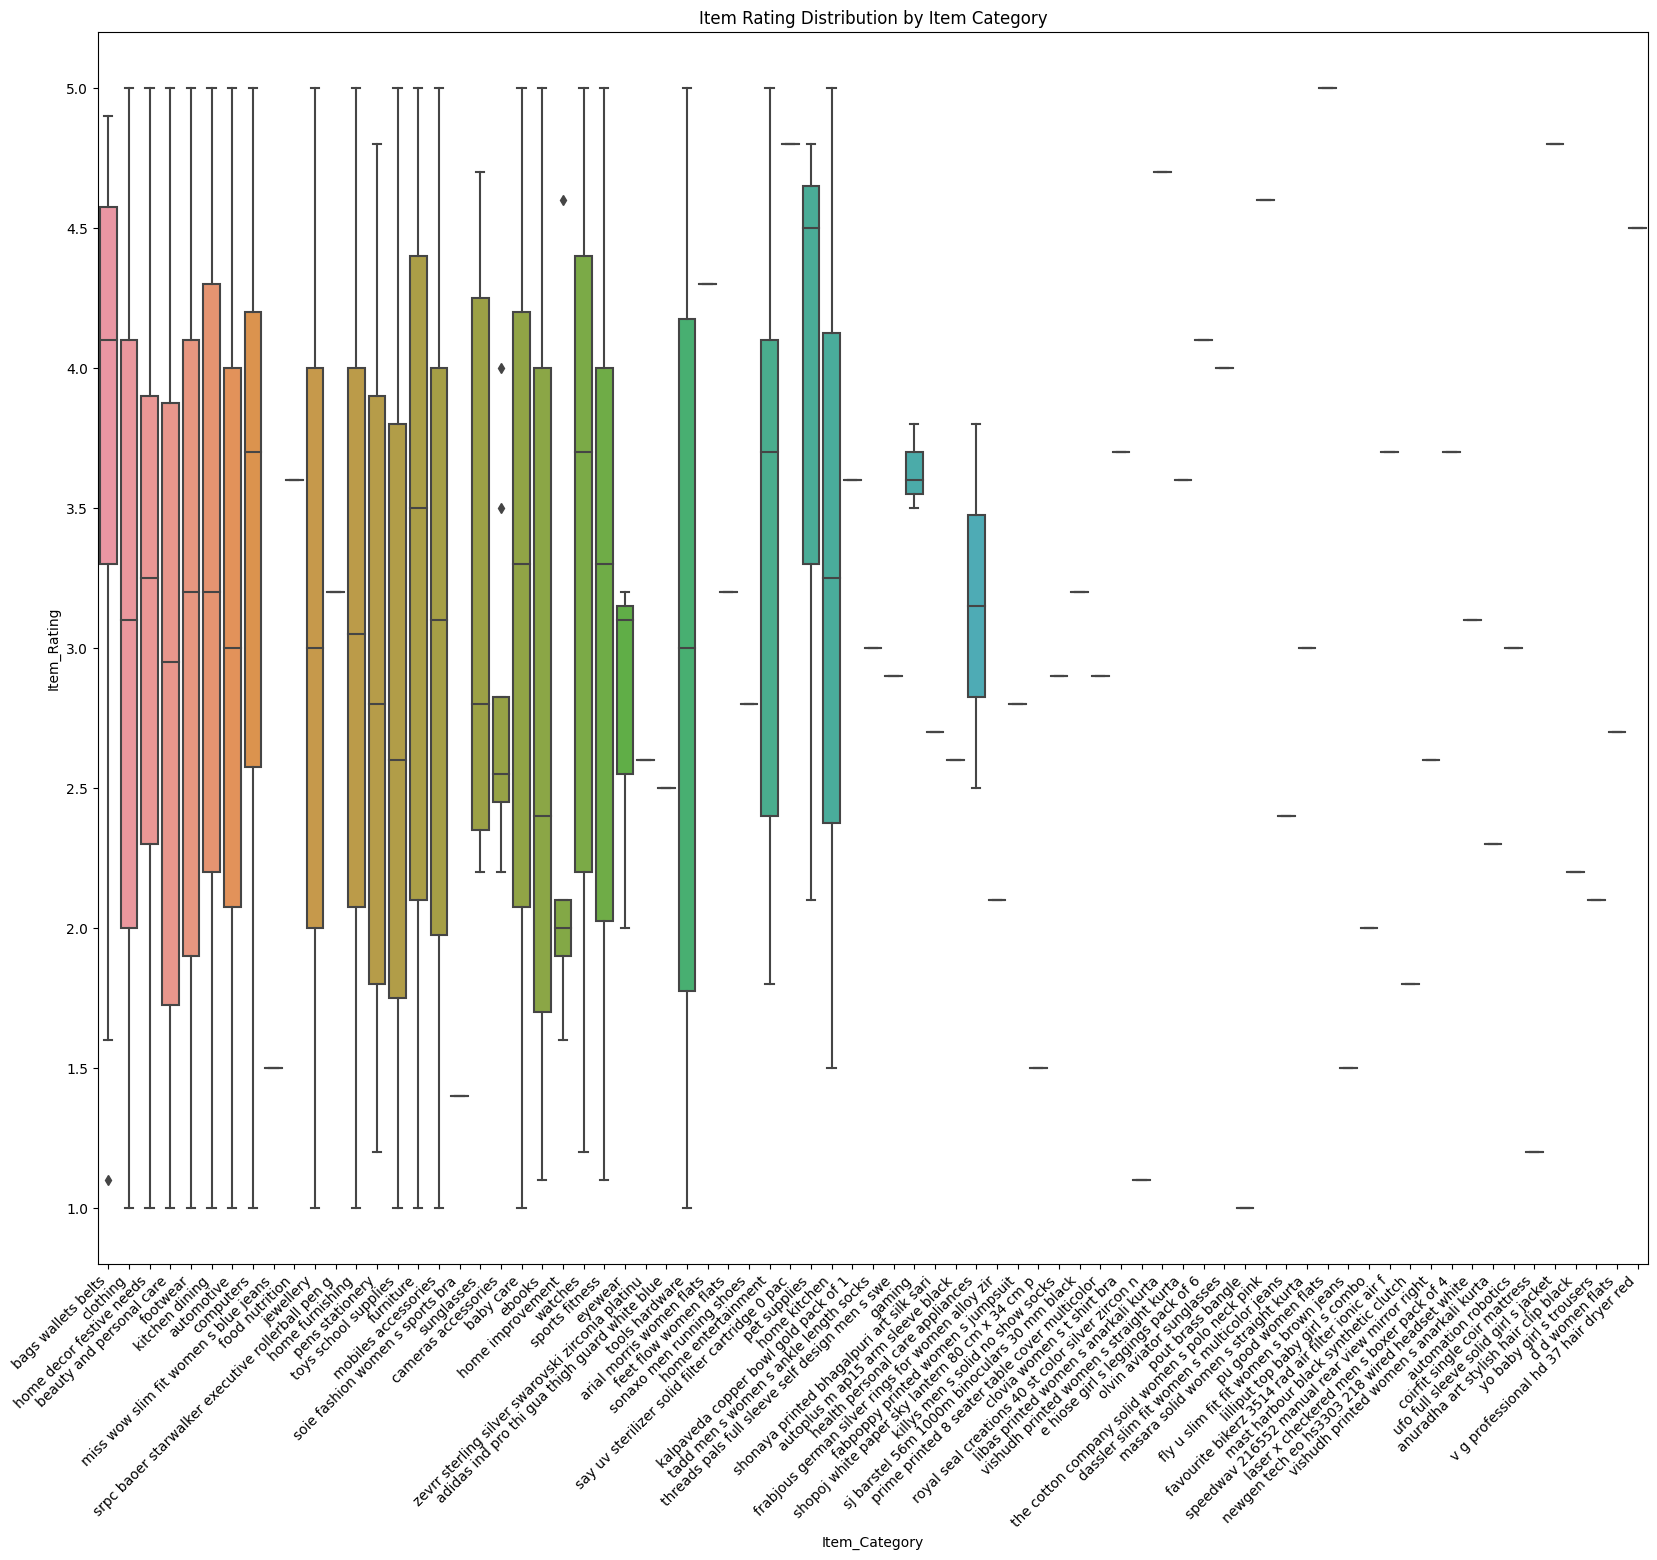

In [19]:
plt.figure(figsize=(20, 16))
sns.boxplot(x='Item_Category', y='Item_Rating', data=train)
plt.title('Item Rating Distribution by Item Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
X = train[['Item_Rating', 'Month', 'Year']]
y = train['Selling_Price']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_val)

In [24]:
mse = mean_squared_error(y_val, predictions)
print("\nMean Squared Error on Validation Set:", mse)


Mean Squared Error on Validation Set: 43785723.26377572


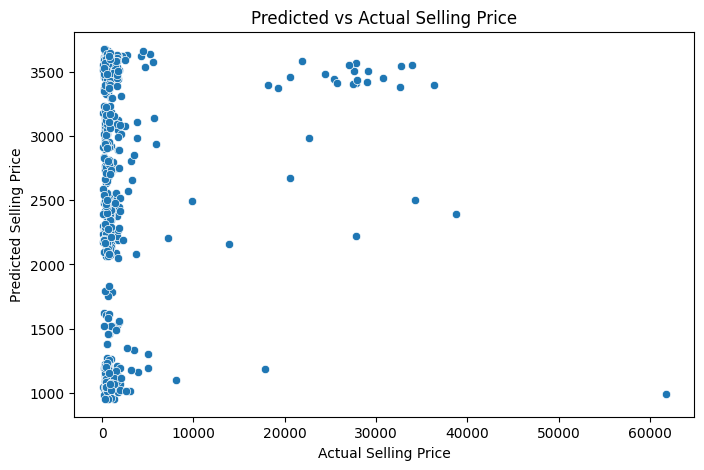

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=predictions)
plt.title('Predicted vs Actual Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

In [26]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_val, predictions)
MSE = metrics.mean_squared_error(y_val, predictions)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,3.050805e+03
MSE,4.378572e+07
RMSE,6.617078e+03


In [27]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()